In [130]:
import pandas as pd

df = pd.read_csv('BTC-USD_17.09.2014-25.10.2023.csv')

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [131]:
start_date = input("Enter the start date (dd-mm-yy): ")
end_date = input("Enter the end date (dd-mm-yy): ")

start_date = pd.to_datetime(start_date, dayfirst=True)

start_date_df_ascending_6month = pd.to_datetime('2020-10-01')
end_date_df_ascending_6month  = pd.to_datetime('2021-04-01')
start_date_df_descending_6month = pd.to_datetime('2021-10-01')
end_date_df_descending_6month  = pd.to_datetime('2022-09-01')
start_date_df_stagnation_6month = pd.to_datetime('2015-11-01')
end_date_df_stagnation_6month  = pd.to_datetime('2016-04-01')
start_date_df_combined_1year = pd.to_datetime('2021-11-01')
end_date_df_combined_1year  = pd.to_datetime('2022-05-01')

2020-01-01 00:00:00


In [132]:
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
filtered_df_ascending_6month = df[(df['Date'] >= start_date_df_ascending_6month) & (df['Date'] <= end_date_df_ascending_6month)]
filtered_df_descending_6month = df[(df['Date'] >= start_date_df_descending_6month) & (df['Date'] <= end_date_df_descending_6month)]
filtered_df_stagnation_6month = df[(df['Date'] >= start_date_df_stagnation_6month) & (df['Date'] <= end_date_df_stagnation_6month)]
filtered_df_combined_1year = df[(df['Date'] >= start_date_df_combined_1year) & (df['Date'] <= end_date_df_combined_1year)]

print(len(filtered_df))
print(filtered_df_ascending_6month)
print(filtered_df_descending_6month)
print(start_date_df_stagnation_6month)
print(filtered_df_combined_1year)

367
           Date          Open          High           Low         Close  \
2206 2020-10-01  10795.254883  10933.624023  10472.356445  10619.452148   
2207 2020-10-02  10619.821289  10657.837891  10416.689453  10575.974609   
2208 2020-10-03  10575.100586  10598.940430  10511.129883  10549.329102   
2209 2020-10-04  10550.440430  10686.000000  10534.391602  10669.583008   
2210 2020-10-05  10676.529297  10793.507813  10634.600586  10793.339844   
...         ...           ...           ...           ...           ...   
2384 2021-03-28  55974.941406  56610.312500  55071.113281  55950.746094   
2385 2021-03-29  55947.898438  58342.097656  55139.339844  57750.199219   
2386 2021-03-30  57750.132813  59447.222656  57251.550781  58917.691406   
2387 2021-03-31  58930.277344  59930.027344  57726.417969  58918.832031   
2388 2021-04-01  58926.562500  59586.070313  58505.277344  59095.808594   

         Adj Close       Volume  
2206  10619.452148  40023134100  
2207  10575.974609  4866145

In [133]:
initial_balance = int(input("Enter the initial balance of trading bot wallet: "))
buy_price = None  # Price at which the bot bought BTCUSDT
profit_percent = float(input("Enter the profit in %(minimum value 1.01): "))
balance = initial_balance
trades_asc = []
trades_dsc = []
trades_stg = []
trades_com = []

100


In [134]:
def trading_bot_1(balance, data, mode, fee):
    trades = []
    holding = 0
    last_buy_balance = 0
      # List to store trade details

    for index, row in data.iterrows():

        date = row['Date']
        open_price = row['Open']
        close_price = row['Close']

        if holding == 0:
            buy_price = open_price
            real_balance = balance - (fee / balance) * 100
            last_buy_balance = real_balance
            holding = real_balance / buy_price
            trades.append(['Buy', date, buy_price, holding, real_balance, 0, 0])
        if holding > 0:
            current_value = holding * close_price
            profit = (current_value - last_buy_balance) / last_buy_balance * 100

            if profit >= profit_percent:
                balance = current_value
                holding = 0
                last_buy_balance =  current_value
                profit_to_initial_balance = current_value - initial_balance / initial_balance * 100
                trades.append(['Sell', date, close_price, holding, balance, profit, profit_to_initial_balance])
            else:
                trades.append(['Hold', date, close_price, holding, current_value, profit, 0])

    final_balance = trades[-1][-3]
    return final_balance, trades


In [136]:
print(f"Initial Balance: ${initial_balance}")

final_balance_tb1, trades_asc = trading_bot_1(balance, filtered_df_ascending_6month, 'ASC', 2)
print(f"Final Balance ASC_6M: ${final_balance_tb1}")
trades_df = pd.DataFrame(trades_asc, columns=['Mode', 'Date', 'Price', 'Holding', 'Balance', 'Profit Percentage', 'Profit to Initial Balance'])
trades_df.to_csv('tradesASC.csv', index=False)

final_balance_tb2, trades_dsc = trading_bot_1(balance, filtered_df_descending_6month, 'DSC', 2)
print(f"Final Balance DSC_6M: ${final_balance_tb2}")
trades_df = pd.DataFrame(trades_dsc, columns=['Mode', 'Date', 'Price', 'Holding', 'Balance', 'Profit Percentage', 'Profit to Initial Balance'])
trades_df.to_csv('tradesDSC.csv', index=False)

final_balance_tb3, trades_stg = trading_bot_1(balance, filtered_df_stagnation_6month, 'STG', 2)
print(f"Final Balance STG_6M: ${final_balance_tb3}")
trades_df = pd.DataFrame(trades_stg, columns=['Mode', 'Date', 'Price', 'Holding', 'Balance', 'Profit Percentage', 'Profit to Initial Balance'])
trades_df.to_csv('tradesSTG.csv', index=False)

final_balance_tb4, trades_com = trading_bot_1(balance, filtered_df_combined_1year, 'COM', 2)
print(f"Final Balance COM_1Y: ${final_balance_tb4}")
trades_df = pd.DataFrame(trades_com, columns=['Mode', 'Date', 'Price', 'Holding', 'Balance', 'Profit Percentage', 'Profit to Initial Balance'])
trades_df.to_csv('tradesCOM.csv', index=False)

Initial Balance: $100
Final Balance ASC_6M: $337.82945109680827
Final Balance DSC_6M: $39.59545068916449
Final Balance STG_6M: $118.36186473267354
Final Balance COM_1Y: $59.1878589261458


In [137]:
df_asc = pd.read_csv('tradesASC.csv')
df_dsc = pd.read_csv('tradesDSC.csv')
df_stg = pd.read_csv('tradesSTG.csv')
df_com = pd.read_csv('tradesCOM.csv')

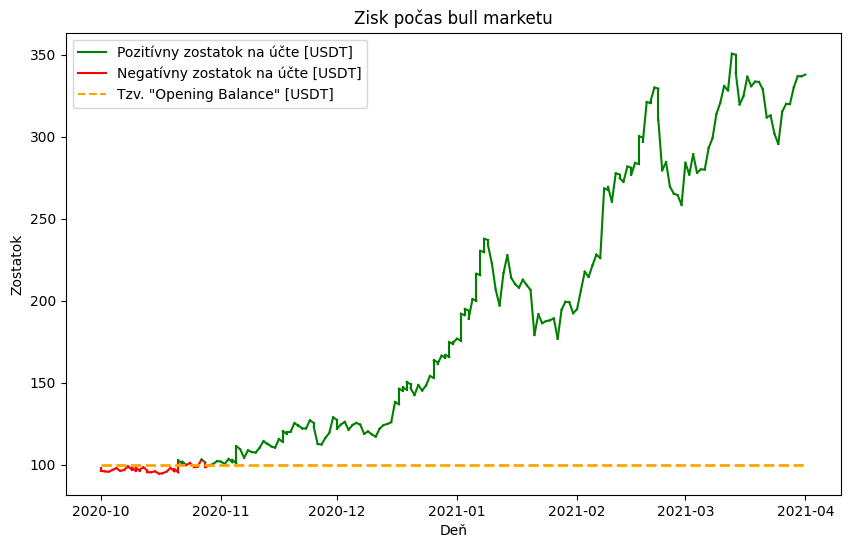

In [138]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.figure(figsize=(10, 6))
for i in range(1, len(df_asc['Date'])):
    if df_asc['Balance'][i-1] >= initial_balance and df_asc['Balance'][i] >= initial_balance:
        plt.plot([pd.to_datetime(df_asc['Date'][i-1]), pd.to_datetime(df_asc['Date'][i])],
                 [df_asc['Balance'][i-1], df_asc['Balance'][i]], color='green')
    else:
        plt.plot([pd.to_datetime(df_asc['Date'][i-1]), pd.to_datetime(df_asc['Date'][i])],
                 [df_asc['Balance'][i-1], df_asc['Balance'][i]], color='red')

plt.plot([pd.to_datetime(df_asc['Date'][0]), pd.to_datetime(df_asc['Date'][len(df_asc['Date'])-1])], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2, label='Zostatok na účte [USDT]')

legend_elements = [Line2D([0], [0], color='green', label='Pozitívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='red', label='Negatívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='orange', linestyle='dashed', label='Tzv. "Opening Balance" [USDT]')]

plt.legend(handles=legend_elements)
plt.title('Zisk počas bull marketu')
plt.xlabel('Deň')
plt.ylabel('Zostatok')
plt.show()

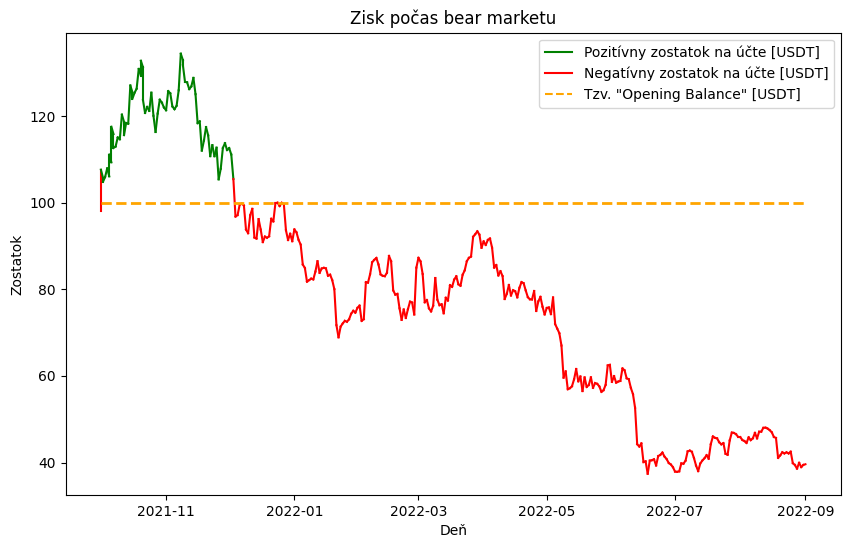

In [139]:
plt.figure(figsize=(10, 6))
for i in range(1, len(df_dsc['Date'])):
    if df_dsc['Balance'][i-1] >= initial_balance and df_dsc['Balance'][i] >= initial_balance:
        plt.plot([pd.to_datetime(df_dsc['Date'][i-1]), pd.to_datetime(df_dsc['Date'][i])],
                 [df_dsc['Balance'][i-1], df_dsc['Balance'][i]], color='green')
    else:
        plt.plot([pd.to_datetime(df_dsc['Date'][i-1]), pd.to_datetime(df_dsc['Date'][i])],
                 [df_dsc['Balance'][i-1], df_dsc['Balance'][i]], color='red')

plt.plot([pd.to_datetime(df_dsc['Date'][0]), pd.to_datetime(df_dsc['Date'][len(df_dsc['Date'])-1])], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2, label='Zostatok na účte [USDT]')

legend_elements = [Line2D([0], [0], color='green', label='Pozitívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='red', label='Negatívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='orange', linestyle='dashed', label='Tzv. "Opening Balance" [USDT]')]

plt.legend(handles=legend_elements)
plt.title('Zisk počas bear marketu')
plt.xlabel('Deň')
plt.ylabel('Zostatok')

plt.show()

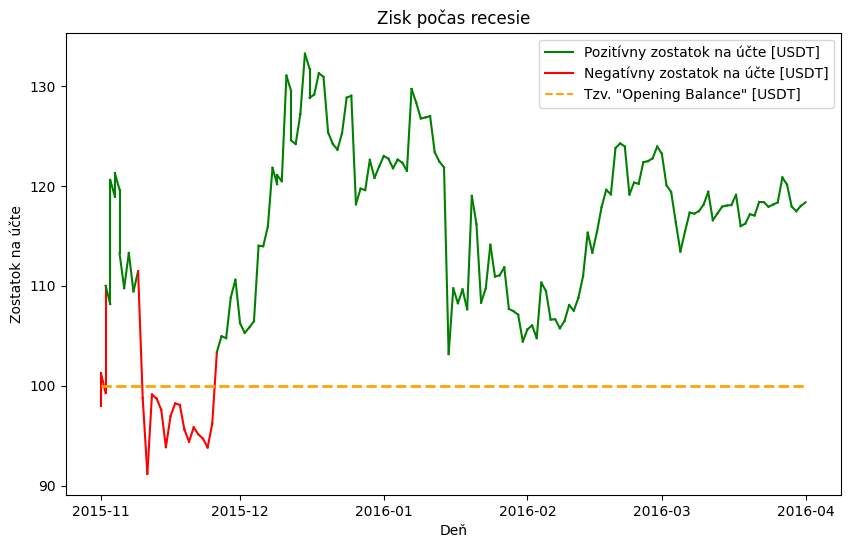

In [140]:
plt.figure(figsize=(10, 6))
for i in range(1, len(df_stg['Date'])):
    if df_stg['Balance'][i-1] >= initial_balance and df_stg['Balance'][i] >= initial_balance:
        plt.plot([pd.to_datetime(df_stg['Date'][i-1]), pd.to_datetime(df_stg['Date'][i])],
                 [df_stg['Balance'][i-1], df_stg['Balance'][i]], color='green')
    else:
        plt.plot([pd.to_datetime(df_stg['Date'][i-1]), pd.to_datetime(df_stg['Date'][i])],
                 [df_stg['Balance'][i-1], df_stg['Balance'][i]], color='red')

plt.plot([pd.to_datetime(df_stg['Date'][0]), pd.to_datetime(df_stg['Date'][len(df_stg['Date'])-1])], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2, label='Zostatok na účte [USDT]')

legend_elements = [Line2D([0], [0], color='green', label='Pozitívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='red', label='Negatívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='orange', linestyle='dashed', label='Tzv. "Opening Balance" [USDT]')]

plt.legend(handles=legend_elements)
plt.title('Zisk počas recesie')
plt.xlabel('Deň')
plt.ylabel('Zostatok na účte')
plt.show()

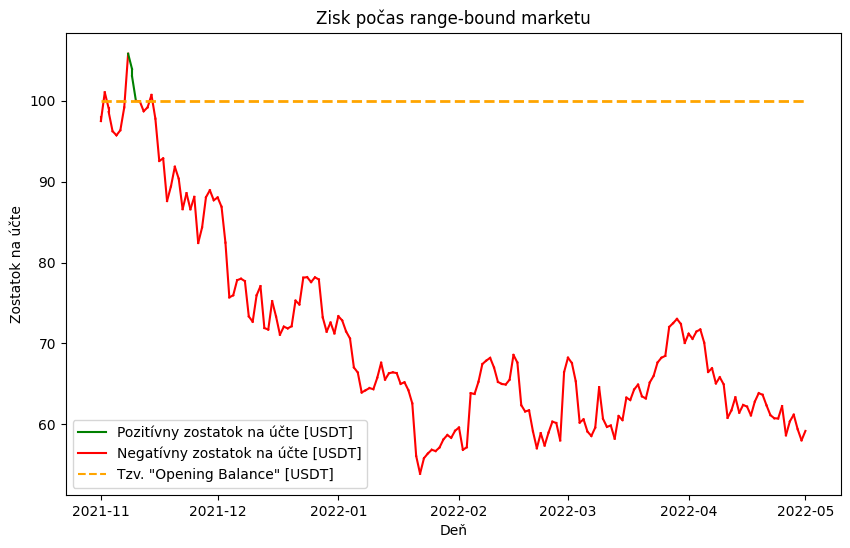

In [141]:
plt.figure(figsize=(10, 6))
for i in range(1, len(df_com['Date'])):
    if df_com['Balance'][i-1] >= initial_balance and df_com['Balance'][i] >= initial_balance:
        plt.plot([pd.to_datetime(df_com['Date'][i-1]), pd.to_datetime(df_com['Date'][i])],
                 [df_com['Balance'][i-1], df_com['Balance'][i]], color='green')
    else:
        plt.plot([pd.to_datetime(df_com['Date'][i-1]), pd.to_datetime(df_com['Date'][i])],
                 [df_com['Balance'][i-1], df_com['Balance'][i]], color='red')

plt.plot([pd.to_datetime(df_com['Date'][0]), pd.to_datetime(df_com['Date'][len(df_com['Date'])-1])], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2, label='Zostatok na účte [USDT]')

legend_elements = [Line2D([0], [0], color='green', label='Pozitívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='red', label='Negatívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='orange', linestyle='dashed', label='Tzv. "Opening Balance" [USDT]')]

plt.legend(handles=legend_elements)
plt.title('Zisk počas range-bound marketu')
plt.xlabel('Deň')
plt.ylabel('Zostatok na účte')
plt.show()

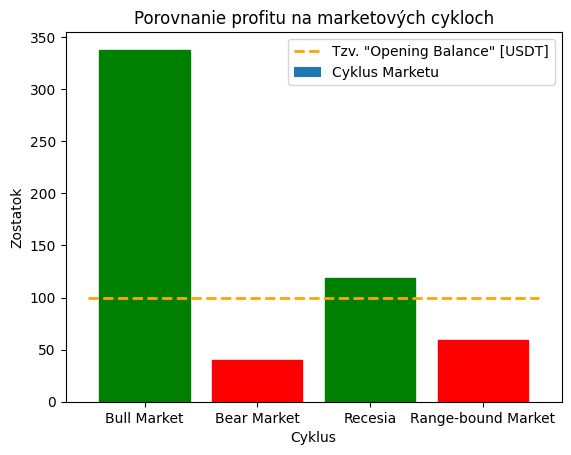

In [152]:
x_pos = ['Bull Market', 'Bear Market', 'Recesia', 'Range-bound Market']
y_pos = [final_balance_tb1, final_balance_tb2, final_balance_tb3, final_balance_tb4]

bars = plt.bar(x_pos,y_pos)
plt.plot([-0.5, len(x_pos)-0.5], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2)
plt.legend(['Tzv. "Opening Balance" [USDT]', 'Cyklus Marketu'])
plt.title('Porovnanie profitu na marketových cykloch')
plt.xlabel('Cyklus')
plt.ylabel('Zostatok')

for i in range(len(bars)):
    if initial_balance > y_pos[i]:
        bars[i].set_color('red')
    else:
        bars[i].set_color('green')


Mode
Hold    140
Buy      44
Sell     43
Name: count, dtype: int64


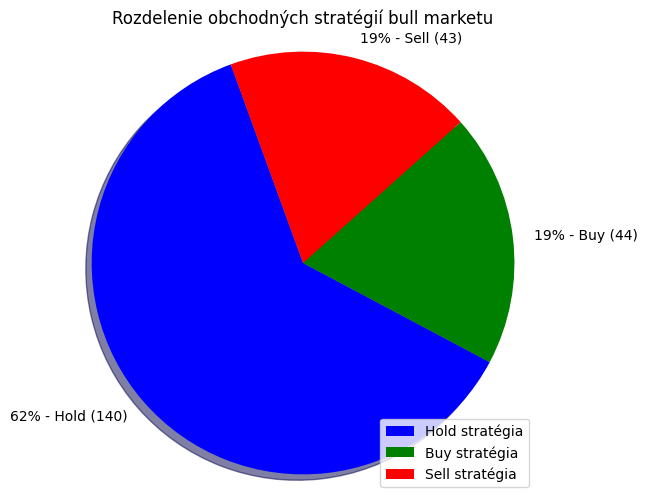

In [143]:
mode_counts = df_asc['Mode'].value_counts()
print(mode_counts)
plt.figure(figsize=(6, 6))
labels = [f"{count / len(df_asc) * 100:.0f}% - {mode} ({count})" for mode, count in zip(mode_counts.index, mode_counts)]
plt.pie(mode_counts, labels=labels, autopct='', colors=['blue','green','red'],shadow=True, startangle=110)
plt.legend(['Hold stratégia', 'Buy stratégia', 'Sell stratégia'], loc='lower right')
plt.title('Rozdelenie obchodných stratégií bull marketu')
plt.axis('equal')

plt.show()

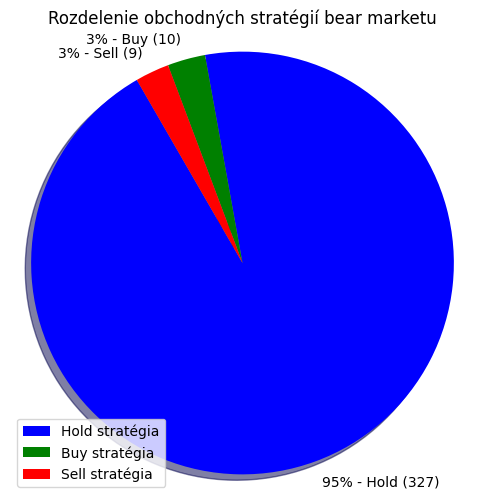

In [144]:
mode_counts = df_dsc['Mode'].value_counts()

plt.figure(figsize=(6, 6))
labels = [f"{count / len(df_dsc) * 100:.0f}% - {mode} ({count})" for mode, count in zip(mode_counts.index, mode_counts)]
plt.pie(mode_counts, labels=labels, autopct='', colors=['blue','green','red'], shadow=True, startangle=120)
plt.legend(['Hold stratégia', 'Buy stratégia', 'Sell stratégia'], loc='lower left')
plt.title('Rozdelenie obchodných stratégií bear marketu')
plt.axis('equal')

plt.show()

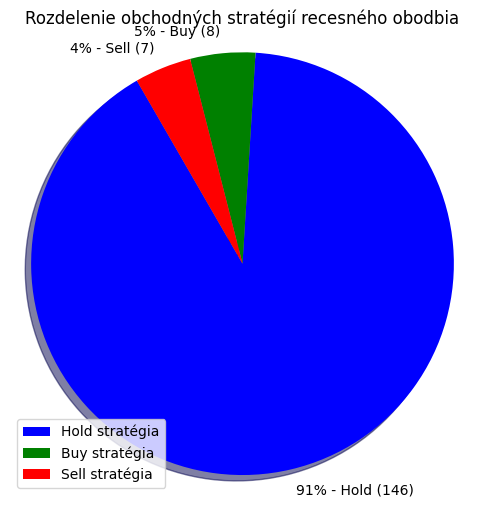

In [145]:
mode_counts = df_stg['Mode'].value_counts()

plt.figure(figsize=(6, 6))
labels = [f"{count / len(df_stg) * 100:.0f}% - {mode} ({count})" for mode, count in zip(mode_counts.index, mode_counts)]
plt.pie(mode_counts, labels=labels, autopct='', colors=['blue','green','red'], shadow=True, startangle=120)
plt.legend(['Hold stratégia', 'Buy stratégia', 'Sell stratégia'], loc='lower left')
plt.title('Rozdelenie obchodných stratégií recesného obodbia')
plt.axis('equal')

plt.show()

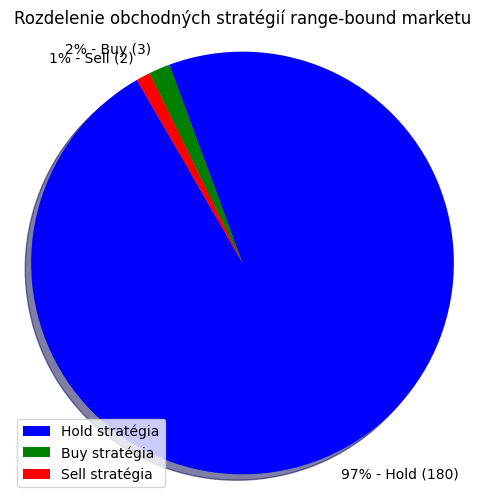

In [146]:
mode_counts = df_com['Mode'].value_counts()

plt.figure(figsize=(6, 6))
labels = [f"{count / len(df_com) * 100:.0f}% - {mode} ({count})" for mode, count in zip(mode_counts.index, mode_counts)]
plt.pie(mode_counts, labels=labels, autopct='', colors=['blue','green','red'], shadow=True, startangle=120)
plt.legend(['Hold stratégia', 'Buy stratégia', 'Sell stratégia'], loc='lower left')
plt.title('Rozdelenie obchodných stratégií range-bound marketu')
plt.axis('equal')

plt.show()

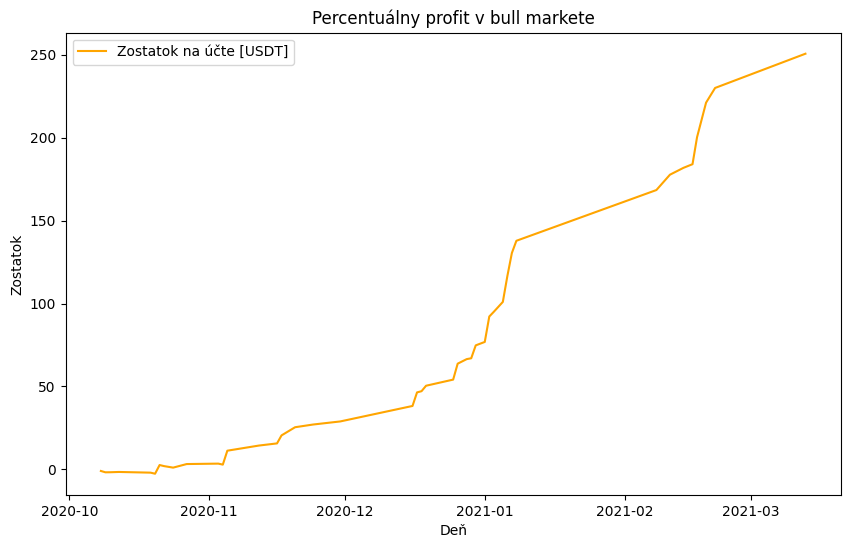

In [147]:
df_asc_filtered = df_asc[df_asc['Profit to Initial Balance'] != 0]
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_asc_filtered['Date']), df_asc_filtered['Profit to Initial Balance'], color='orange')
plt.legend(['Zostatok na účte [USDT]'])
plt.xlabel('Deň')
plt.ylabel('Zostatok')
plt.title('Percentuálny profit v bull markete')
plt.show()

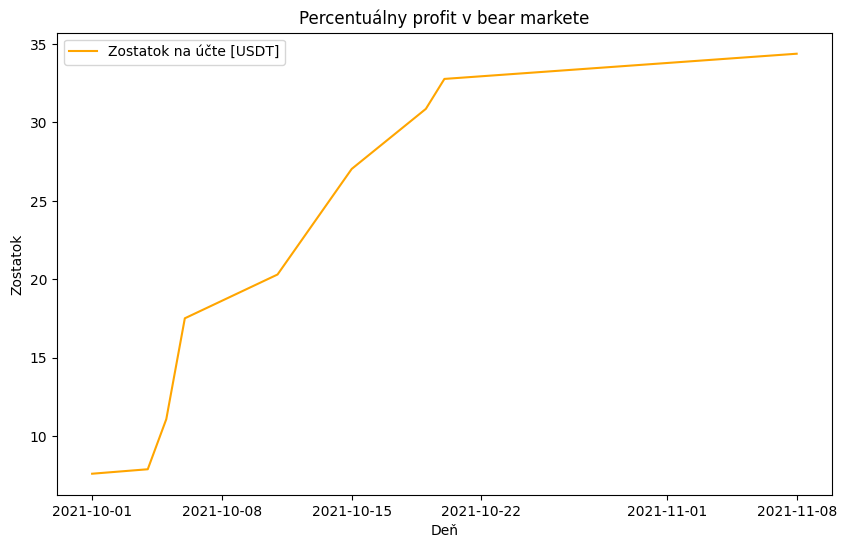

In [148]:
df_dsc_filtered = df_dsc[df_dsc['Profit to Initial Balance'] != 0]
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_dsc_filtered['Date']), df_dsc_filtered['Profit to Initial Balance'], color='orange')
plt.legend(['Zostatok na účte [USDT]'])
plt.xlabel('Deň')
plt.ylabel('Zostatok')
plt.title('Percentuálny profit v bear markete')
plt.show()

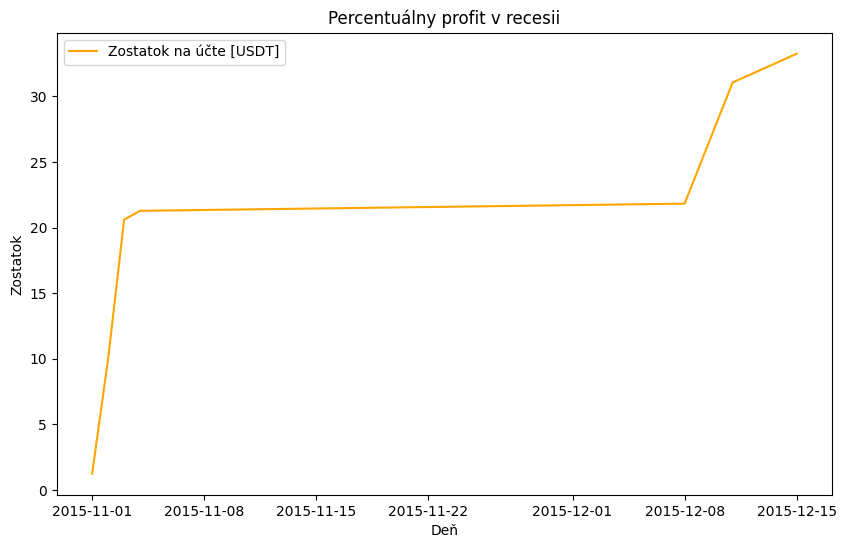

In [149]:
df_stg_filtered = df_stg[df_stg['Profit to Initial Balance'] != 0]
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_stg_filtered['Date']), df_stg_filtered['Profit to Initial Balance'], color='orange')
plt.legend(['Zostatok na účte [USDT]'])
plt.xlabel('Deň')
plt.ylabel('Zostatok')
plt.title('Percentuálny profit v recesii')
plt.show()

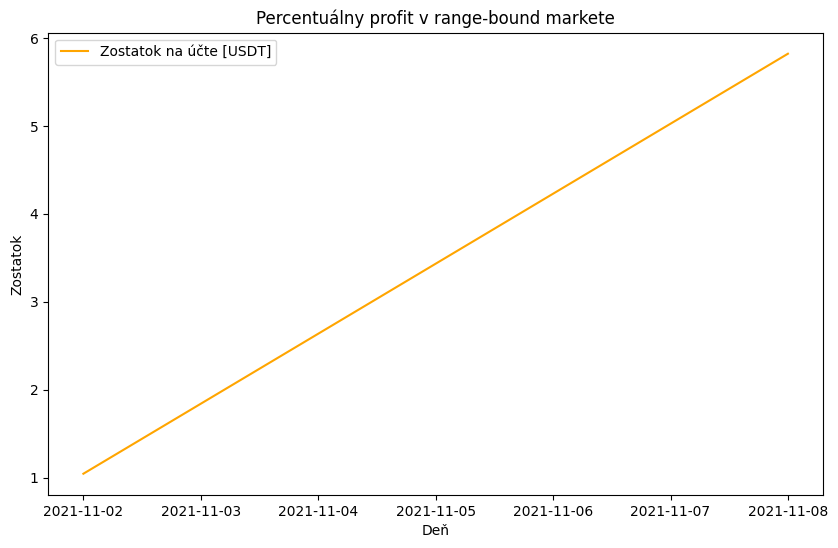

In [150]:
df_com_filtered = df_com[df_com['Profit to Initial Balance'] != 0]
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_com_filtered['Date']), df_com_filtered['Profit to Initial Balance'], color='orange')
plt.legend(['Zostatok na účte [USDT]'])
plt.xlabel('Deň')
plt.ylabel('Zostatok')
plt.title('Percentuálny profit v range-bound markete')
plt.show()

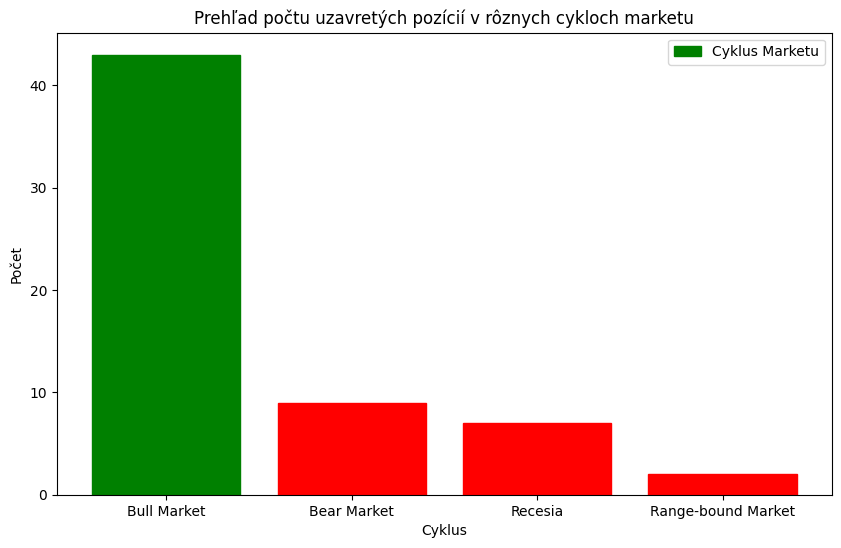

In [151]:
x_pos = ['Bull Market', 'Bear Market', 'Recesia', 'Range-bound Market']
y_pos = [len(df_asc_filtered), len(df_dsc_filtered), len(df_stg_filtered), len(df_com_filtered)]
plt.figure(figsize=(10, 6))
max_count_index = y_pos.index(max(y_pos))
colors = ['red' if i != max_count_index else 'green' for i in range(len(x_pos))]

bars = plt.bar(x_pos,y_pos)

for i, bar in enumerate(bars):
    bar.set_color(colors[i])

plt.legend(['Cyklus Marketu'])
plt.title('Prehľad počtu uzavretých pozícií v rôznych cykloch marketu')
plt.xlabel('Cyklus')
plt.ylabel('Počet')

plt.show()